In [2]:
## imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import os
import glob
import random
import pathlib
import zipfile

In [3]:
## importing textfile having informattion about our dataset:

dataset_info = pd.read_csv("../input/10-monkey-species/monkey_labels.txt")

In [4]:
dataset_info

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [5]:
## let's see column names:

dataset_info.columns

Index(['Label', '  Latin Name           ', ' Common Name                   ',
       ' Train Images ', ' Validation Images'],
      dtype='object')

In [7]:
## let's have a look at label and common name:

dataset_info["Label"][0],dataset_info[' Common Name                   '][0]

('n0   ', ' mantled_howler                ')

In [8]:
## we can see that their are lots unusual spaces,
## let's get rid of them because folders are names as n0, n1 .....
## we need to link these n0, n1 ... with common name which we will use as our class names...

In [9]:
## using lambda function to remove white spaces:

dataset_info["Label"] = dataset_info["Label"].apply(lambda x: x.replace(" ",""))
dataset_info[' Common Name                   '] = dataset_info[' Common Name                   '].apply(lambda x: x.replace(" ",""))

In [10]:
## let's make 2 list 1 containing labels and other common names:

labels_list = list(dataset_info["Label"])
common_names_list = list(dataset_info[' Common Name                   '])

In [11]:
labels_list

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [12]:
common_names_list

['mantled_howler',
 'patas_monkey',
 'bald_uakari',
 'japanese_macaque',
 'pygmy_marmoset',
 'white_headed_capuchin',
 'silvery_marmoset',
 'common_squirrel_monkey',
 'black_headed_night_monkey',
 'nilgiri_langur']

In [13]:
## let's focus on our image dataset now:

In [14]:
train_dir = "../input/10-monkey-species/training/training/"
val_dir = "../input/10-monkey-species/validation/validation/"

In [15]:
## let's see folders inside our train directory:
os.listdir(train_dir)

['n8', 'n6', 'n7', 'n1', 'n0', 'n2', 'n5', 'n4', 'n9', 'n3']

In [16]:
## let's see folders inside our validation directory:
os.listdir(val_dir)

['n8', 'n6', 'n7', 'n1', 'n0', 'n2', 'n5', 'n4', 'n9', 'n3']

In [17]:
class_names = labels_list

In [18]:
## let's see how many images are there in each folder and get an idea about our dataset length:
## os.walk goes into each folder inside a path and takes three arguments as given below.

for dir_path, folder, files in os.walk(train_dir):
    print(f"There are {len(folder)} directories and {len(files)} images in '{dir_path}'.")

There are 10 directories and 0 images in '../input/10-monkey-species/training/training/'.
There are 0 directories and 106 images in '../input/10-monkey-species/training/training/n8'.
There are 0 directories and 106 images in '../input/10-monkey-species/training/training/n6'.
There are 0 directories and 114 images in '../input/10-monkey-species/training/training/n7'.
There are 0 directories and 111 images in '../input/10-monkey-species/training/training/n1'.
There are 0 directories and 105 images in '../input/10-monkey-species/training/training/n0'.
There are 0 directories and 110 images in '../input/10-monkey-species/training/training/n2'.
There are 0 directories and 113 images in '../input/10-monkey-species/training/training/n5'.
There are 0 directories and 105 images in '../input/10-monkey-species/training/training/n4'.
There are 0 directories and 106 images in '../input/10-monkey-species/training/training/n9'.
There are 0 directories and 122 images in '../input/10-monkey-species/tra

In [19]:
## let's do it for validation dataset:

for dir_path, folder, files in os.walk(val_dir):
    print(f"There are {len(folder)} directories and {len(files)} images in '{dir_path}'.")

There are 10 directories and 0 images in '../input/10-monkey-species/validation/validation/'.
There are 0 directories and 27 images in '../input/10-monkey-species/validation/validation/n8'.
There are 0 directories and 26 images in '../input/10-monkey-species/validation/validation/n6'.
There are 0 directories and 28 images in '../input/10-monkey-species/validation/validation/n7'.
There are 0 directories and 28 images in '../input/10-monkey-species/validation/validation/n1'.
There are 0 directories and 26 images in '../input/10-monkey-species/validation/validation/n0'.
There are 0 directories and 27 images in '../input/10-monkey-species/validation/validation/n2'.
There are 0 directories and 28 images in '../input/10-monkey-species/validation/validation/n5'.
There are 0 directories and 26 images in '../input/10-monkey-species/validation/validation/n4'.
There are 0 directories and 26 images in '../input/10-monkey-species/validation/validation/n9'.
There are 0 directories and 30 images in '

In [20]:
## let's count all the images:

train_dir = pathlib.Path(train_dir)    ## getting our train path in pathlib for control on train_path
image_count = len(list(train_dir.glob("*/*")))  ## getting list of all images in all folders using 
                                                ## glob(*/*) and than counting it
image_count

1098

In [21]:
## we will load and preprocess using tf.data,
## This is bit lengthy and tricky but will give as finer control:
## for info visit: https://www.tensorflow.org/tutorials/load_data/images

In [22]:
## imports:

import tensorflow as tf
import tensorflow_datasets as tfds

In [23]:
## we are getting list of all image_file_paths in list_ds and it's not usual python list:

list_ds = tf.data.Dataset.list_files(str(train_dir/"*/*"),shuffle=False)
list_ds = list_ds.shuffle(image_count,reshuffle_each_iteration=False)

In [24]:
type(list_ds)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [25]:
## let's look list_ds:
for f in list_ds.take(3):
    print(f.numpy())

b'../input/10-monkey-species/training/training/n0/n0120.jpg'
b'../input/10-monkey-species/training/training/n4/n4111.jpg'
b'../input/10-monkey-species/training/training/n3/n3125.jpg'


In [26]:
## splitting our dataset:

test_size = int(image_count*0.2)  ## get integer value of 20 percent of all images
train_ds = list_ds.skip(test_size) ## setting train_ds as 80 percent of all images by skipping 20%
test_ds = list_ds.take(test_size)

In [27]:
## checking lengths of our train and test dataset:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(test_ds).numpy())

879
219


In [28]:
## Our train_ds and test_ds are nothing but file_paths of our images present in train_dir till now

In [29]:
## function that gives us label from file_paths:

def get_label(file_path):
    
    ## converts file_path into parts
    file_path_parts = tf.strings.split(file_path,os.path.sep)
    
    ## the second last part is our label and we are comparing it with class_names list
    one_hot = file_path_parts[-2] == class_names  ## we ll get one hot result
    
    return tf.argmax(one_hot)   ## will return index where value is max(that is 1) in one_hot
    

In [30]:
## this is just 1 sample to illustrate the above function:

for f in train_ds.take(1):
    parts = tf.strings.split(f,os.path.sep)
    print(parts[-2])
    one_hot = parts[-2] == class_names
    print(one_hot)
    print(tf.argmax(one_hot))

tf.Tensor(b'n8', shape=(), dtype=string)
tf.Tensor([False False False False False False False False  True False], shape=(10,), dtype=bool)
tf.Tensor(8, shape=(), dtype=int64)


In [31]:
## function to decode image:

def decode_img(img):
    
    img = tf.image.decode_jpeg(img,channels=3)
    return tf.image.resize(img,[180,180])     ## returns a resized image after decoding it

In [32]:
# let's combine above 2 functions to get a tupple of (img,label):

def process_path(file_path):
    
    label = get_label(file_path)     ## get label using the 1st function
    img = tf.io.read_file(file_path)    ## read image from file_path
    img = decode_img(img)              ## decode image using 2nd function
    
    return img,label

In [33]:
## setting autotune

AUTOTUNE = tf.data.AUTOTUNE

In [34]:
## mapping the above created function on train_ds and test_ds:
## num_parallel_calls helps in loading/processing multiple images in parallel
## This will significantly speed up our work

train_ds = train_ds.map(process_path,num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(process_path,num_parallel_calls=AUTOTUNE)

In [35]:
for image, label in train_ds.take(1):
    print(f'Image shape: {image.shape}')
    print(f'Image label: {label}')

Image shape: (180, 180, 3)
Image label: 8


In [36]:
## function to optimize performance:

def optimize_performance(ds):
    
    ds = ds.cache()
    ds = ds.shuffle(buffer_size = 879) 
    ds = ds.batch(32)
    ds = ds.prefetch(buffer_size = AUTOTUNE) ##
    return ds  

In [38]:
## from tensorflow.keras import mixed_precision
## mixed_precision.set_global_policy(policy="mixed_float16")

In [39]:
## let's apply performnace optimization function to our dataset:

train_ds = optimize_performance(train_ds)
test_ds = optimize_performance(test_ds)

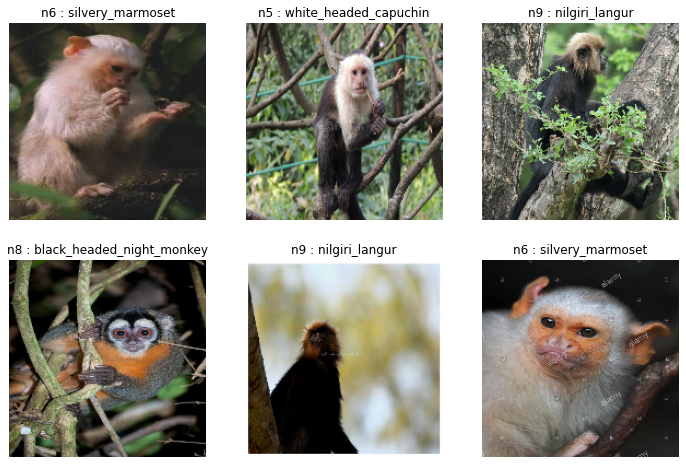

In [40]:
## let's visualize some images:

image_batch, label_batch = next(iter(train_ds)) 

plt.figure(figsize=(12,8))
for i in range(6):
    ax = plt.subplot(2,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    plt.title(class_names[label] + " : "+common_names_list[label])
    plt.axis("off")


In [41]:
## imports:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import GlobalAveragePooling2D

In [42]:
## using InceptionV3 as our pretrained model:

base_model = tf.keras.applications.InceptionV3(include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [43]:
base_model.trainable = False      ## since it is pre-trained setting trainable as False

In [44]:
# Setup data augmentation:

data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"), # randomly flip images on horizontal edge
  preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
  preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.2), # randomly zoom into an image
  preprocessing.Rescaling(1./255) # keep for models like ResNet50V2, remove for EfficientNet
], name="data_augmentation")


In [45]:
## Building a Base-Model using Functional api:

inputs = layers.Input(shape = (180,180,3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training = False)
x = GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model = tf.keras.Model(inputs,outputs)

In [46]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 180, 180, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [47]:
## creating checkpoint:

checkpoint_path = "checkpoint_weight/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = "epoch",
                                                         verbose = 1)

In [48]:
## compiling our base model:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [49]:
history = model.fit(train_ds,epochs=5,validation_data=test_ds,callbacks=checkpoint_callback)

Epoch 1/5
28/28 [==============================] - 20s 489ms/step - loss: 2.0706 - accuracy: 0.3921 - val_loss: 0.3112 - val_accuracy: 0.9269

Epoch 00001: saving model to checkpoint_weight/checkpoint.ckpt
Epoch 2/5
28/28 [==============================] - 5s 167ms/step - loss: 0.6348 - accuracy: 0.8025 - val_loss: 0.2302 - val_accuracy: 0.9315

Epoch 00002: saving model to checkpoint_weight/checkpoint.ckpt
Epoch 3/5
28/28 [==============================] - 4s 156ms/step - loss: 0.4847 - accuracy: 0.8337 - val_loss: 0.1809 - val_accuracy: 0.9452

Epoch 00003: saving model to checkpoint_weight/checkpoint.ckpt
Epoch 4/5
28/28 [==============================] - 4s 135ms/step - loss: 0.3304 - accuracy: 0.9004 - val_loss: 0.1725 - val_accuracy: 0.9452

Epoch 00004: saving model to checkpoint_weight/checkpoint.ckpt
Epoch 5/5
28/28 [==============================] - 4s 138ms/step - loss: 0.3613 - accuracy: 0.9004 - val_loss: 0.0963 - val_accuracy: 0.9817

Epoch 00005: saving model to checkpoi

In [50]:
## let's plot loss curves:

def plot_loss_curves(history):
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    ## plotting loss:
    
    plt.plot(epochs,loss,label = "training loss")
    plt.plot(epochs,val_loss, label = "val loss")
    plt.title("loss_curve")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()
    
    ## plotting for accuracy:
    
    plt.figure()
    plt.plot(epochs,accuracy, label = "training accuracy")
    plt.plot(epochs,val_accuracy, label = "val accuracy")
    plt.title("Accuracy_curve")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()

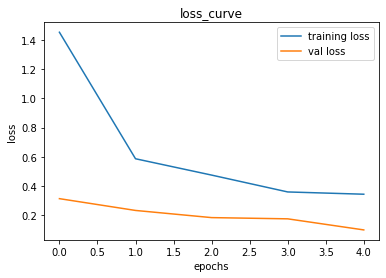

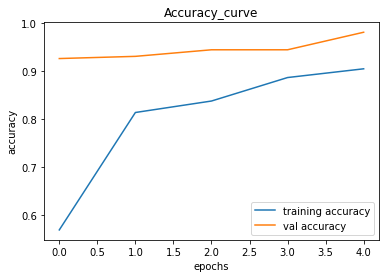

In [51]:
plot_loss_curves(history=history)

In [52]:
## let's tune our base model and try to further improve our score:

In [53]:
## unfreeze all layers:

base_model.trainable = True

## freeze all layers except last 5

for layer in base_model.layers[:-5]:
    layer.trainable = False

In [54]:
## recompiling model with slower learning rate because we don't want to change weights by much:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
              ,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [55]:
tuned_history = model.fit(train_ds,epochs = 10,validation_data=test_ds,initial_epoch=history.epoch[-1])

Epoch 5/10
28/28 [==============================] - 9s 170ms/step - loss: 0.2656 - accuracy: 0.9267 - val_loss: 0.0954 - val_accuracy: 0.9772
Epoch 6/10
28/28 [==============================] - 3s 119ms/step - loss: 0.3182 - accuracy: 0.9024 - val_loss: 0.1015 - val_accuracy: 0.9726
Epoch 7/10
28/28 [==============================] - 3s 111ms/step - loss: 0.2500 - accuracy: 0.9134 - val_loss: 0.0877 - val_accuracy: 0.9772
Epoch 8/10
28/28 [==============================] - 3s 99ms/step - loss: 0.2569 - accuracy: 0.9190 - val_loss: 0.0957 - val_accuracy: 0.9772
Epoch 9/10
28/28 [==============================] - 3s 109ms/step - loss: 0.2269 - accuracy: 0.9347 - val_loss: 0.0947 - val_accuracy: 0.9772
Epoch 10/10
28/28 [==============================] - 3s 104ms/step - loss: 0.2993 - accuracy: 0.9141 - val_loss: 0.1040 - val_accuracy: 0.9726


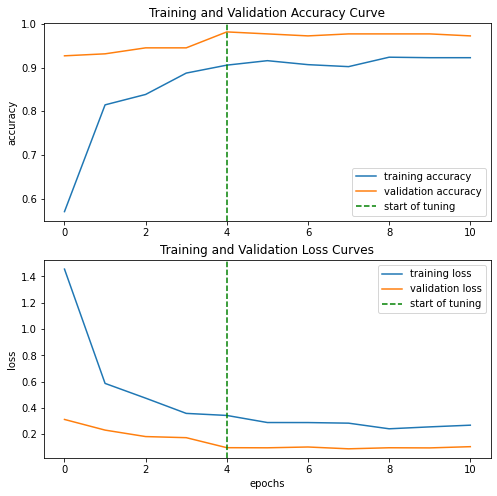

In [56]:
## let's plot untuned and tuned curves together:

def compare_histories(old_history,new_history,initial_epochs=5):
    
    ## un-tuned history data:
    accuracy = old_history.history["accuracy"]
    loss = old_history.history["loss"]
    
    val_accuracy = old_history.history["val_accuracy"]
    val_loss = old_history.history["val_loss"]
    
    ## tuned-history data:
    total_accuracy = accuracy + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]
    
    total_val_accuracy = val_accuracy + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]
    
    ## Make plots:
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_accuracy, label = "training accuracy")
    plt.plot(total_val_accuracy, label = "validation accuracy")
    plt.title("Training and Validation Accuracy Curve")
    #plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.axvline(initial_epochs-1,color = "green", ls = "--",label = "start of tuning")
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(total_loss, label = "training loss")
    plt.plot(total_val_loss, label = "validation loss")
    plt.title("Training and Validation Loss Curves")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.axvline(initial_epochs-1,color = "green", ls = "--",label = "start of tuning")
    plt.legend()
compare_histories(old_history=history,new_history=tuned_history,initial_epochs=5)

In [57]:
## prepapring our validation for our trained model to predict on it:

validation_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                label_mode="categorical",
                                                                image_size=(180,180),
                                                                shuffle=False) 

Found 272 files belonging to 10 classes.


In [58]:
## making predictions:

pred_probs = model.predict(validation_data,verbose=1)

9/9 [==============================] - 9s 855ms/step


In [59]:
len(pred_probs)

272

In [60]:
pred_probs.shape

(272, 10)

In [61]:
pred_probs[31].max()

0.99312544

In [62]:
pred_classes = pred_probs.argmax(axis=1)

In [63]:
pred_classes[:5]

array([0, 0, 0, 0, 0])

In [64]:
y_labels = []
for image, label in validation_data.unbatch():
    y_labels.append(label.numpy().argmax())
y_labels[:7]

[0, 0, 0, 0, 0, 0, 0]

In [65]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.9669117647058824

In [66]:
# function for preparing image to be predicted:

def load_prepare_image(file_name,scale=True):
    
    img = tf.io.read_file(file_name)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img,[180,180])
    
    if scale:
        return img/255.
    else:
        return img

In [67]:
class_name = random.choice(class_names)
class_name

'n3'

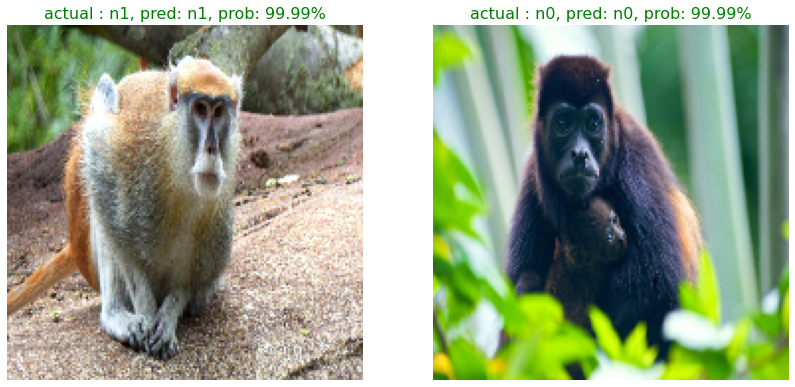

In [68]:
## plot and predict:

plt.figure(figsize=(14,8))
for i in range(2):
    class_name = random.choice(class_names)
    file_name = random.choice(os.listdir(val_dir + "/" + class_name))
    file_path = val_dir + class_name + "/" + file_name
    
    img = load_prepare_image(file_path,scale=False)
    pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
    pred_class = class_names[pred_prob.argmax()]
    pred_class_c_n = common_names_list[pred_prob.argmax()]
    
    ## plot images:
    
    plt.subplot(1,2,i+1)
    plt.imshow(img/255.)
    if class_name == pred_class:
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"actual : {class_name}, pred: {pred_class}, prob: {pred_prob.max()*100:.2f}%",c = title_color,fontsize=16)
    plt.axis(False);

In [69]:
## let's see classification report:
from sklearn.metrics import classification_report
print(classification_report(y_labels,pred_classes))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       0.96      0.96      0.96        28
           2       1.00      0.96      0.98        27
           3       1.00      0.97      0.98        30
           4       0.93      0.96      0.94        26
           5       1.00      1.00      1.00        28
           6       1.00      0.96      0.98        26
           7       0.88      1.00      0.93        28
           8       0.96      0.93      0.94        27
           9       1.00      0.92      0.96        26

    accuracy                           0.97       272
   macro avg       0.97      0.97      0.97       272
weighted avg       0.97      0.97      0.97       272



In [70]:
## let's get dictionary for this classification report:
classification_report_dict = classification_report(y_labels,pred_classes,output_dict=True)
classification_report_dict

{'0': {'precision': 0.9629629629629629,
  'recall': 1.0,
  'f1-score': 0.9811320754716981,
  'support': 26},
 '1': {'precision': 0.9642857142857143,
  'recall': 0.9642857142857143,
  'f1-score': 0.9642857142857143,
  'support': 28},
 '2': {'precision': 1.0,
  'recall': 0.9629629629629629,
  'f1-score': 0.9811320754716981,
  'support': 27},
 '3': {'precision': 1.0,
  'recall': 0.9666666666666667,
  'f1-score': 0.983050847457627,
  'support': 30},
 '4': {'precision': 0.9259259259259259,
  'recall': 0.9615384615384616,
  'f1-score': 0.9433962264150944,
  'support': 26},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 28},
 '6': {'precision': 1.0,
  'recall': 0.9615384615384616,
  'f1-score': 0.9803921568627451,
  'support': 26},
 '7': {'precision': 0.875,
  'recall': 1.0,
  'f1-score': 0.9333333333333333,
  'support': 28},
 '8': {'precision': 0.9615384615384616,
  'recall': 0.9259259259259259,
  'f1-score': 0.9433962264150944,
  'support': 27},
 '9': {'precision': 1.0,

In [71]:
## let's get f-1 score for all classes with actual classnames:
f1_scores = {}

for k,v in classification_report_dict.items():
    if k == "accuracy":
        break
    else:
        f1_scores[class_names[int(k)]] = v["f1-score"]

f1_scores

{'n0': 0.9811320754716981,
 'n1': 0.9642857142857143,
 'n2': 0.9811320754716981,
 'n3': 0.983050847457627,
 'n4': 0.9433962264150944,
 'n5': 1.0,
 'n6': 0.9803921568627451,
 'n7': 0.9333333333333333,
 'n8': 0.9433962264150944,
 'n9': 0.9600000000000001}

In [72]:
## create dataframe for f1_scores for visualization:

f1_scores_df = pd.DataFrame({"class_name" : list(f1_scores.keys()),
                             "common_name" : common_names_list,
                             "f1_score" : list(f1_scores.values())}).sort_values("f1_score",ascending=False)
                            
    
f1_scores_df

,class_name,common_name,f1_score
5,n5,white_headed_capuchin,1.000000
3,n3,japanese_macaque,0.983051
0,n0,mantled_howler,0.981132
2,n2,bald_uakari,0.981132
6,n6,silvery_marmoset,0.980392
1,n1,patas_monkey,0.964286
9,n9,nilgiri_langur,0.960000
4,n4,pygmy_marmoset,0.943396
8,n8,black_headed_night_monkey,0.943396
7,n7,common_squirrel_monkey,0.933333


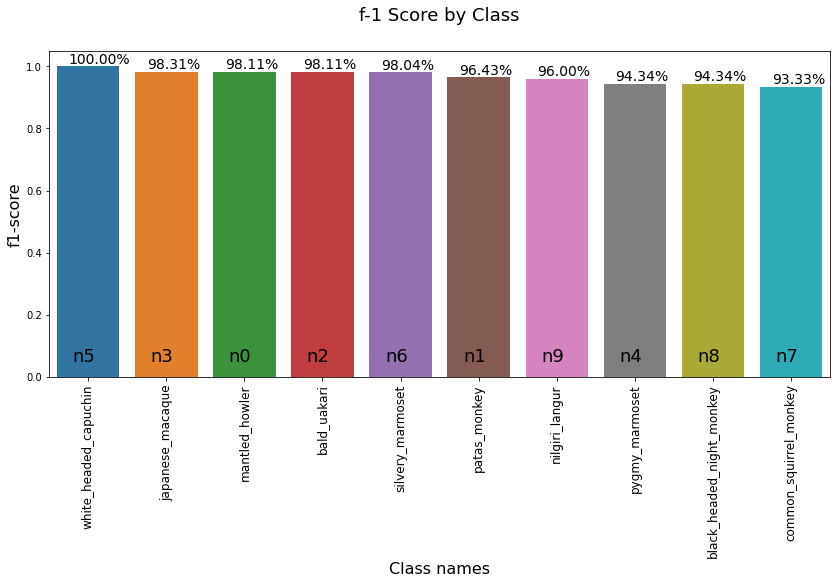

In [73]:
plt.figure(figsize=(14,6))
sns.barplot(x = f1_scores_df["common_name"], y = f1_scores_df["f1_score"])
plt.xlabel("Class names",fontsize = 16)
plt.ylabel("f1-score",fontsize = 16)
plt.xticks(fontsize = 14, rotation = 90)
for index,data in enumerate(f1_scores_df.f1_score):
  plt.text(x=index - 0.25,y=data+0.01,s=f"{data*100:.2f}%",fontsize = 14)
for index,data in enumerate(f1_scores_df.class_name):
  plt.text(x=index - 0.20,y=0.05,s=f"{data}",fontsize = 18)
plt.xticks(fontsize=12)
plt.title("f-1 Score by Class",fontsize=18,pad=30);

In [74]:
## we have performed so many steps to get this bar plots
## Because not everytime we get a well performing model as ours
## This type of charts can help us see where our model is lagging in predicting and in which class.

In [75]:
## predicting some random images from internet:

## patas monkey

!wget -q https://animalia.us-east-1.linodeobjects.com/animals/photos/full/1.25x1/macaque-showing-a-bit-of-tongue.jpg
    
img = load_prepare_image("macaque-showing-a-bit-of-tongue.jpg",scale = False)
pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
pred_class = class_names[pred_prob.argmax()]
pred_class_c_n = common_names_list[pred_prob.argmax()]
print(pred_class,pred_class_c_n)

## you can check for others and can playaround with this

n1 patas_monkey
